In [2]:
from textblob import TextBlob
import nltk
from newspaper import Article

In [27]:
#Get the article from Rss feed 
url = 'https://www.nytimes.com/2020/03/09/us/coronavirus-grand-princess-california.html'
article = Article(url)

In [28]:
# Do some NLP
article.download() #Downloads the link’s HTML content
article.parse() #Parse the article
nltk.download('punkt')#1 time download of the sentence tokenizer
article.nlp()#  Keyword extraction wrapper3.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:

#Get the summary of the article
text = article.summary

#print text
print(text)

(Here’s the sign-up, if you don’t already get California Today by email.)
Over the weekend, confusion and fear about the widening coronavirus outbreak gave way to a heightened new reality for Californians forced to fit their lives around containment measures that might have seemed unthinkable just days ago.
Stanford University classes were set to stop meeting in person today, and The San Francisco Chronicle reported that Salesforce, the tech giant based in San Francisco, joined the ranks of companies ordering employees to work from home.
“I’m like on the run from the virus,” Zara Khan, a junior at the University of California, Berkeley, who left a study-abroad program in Florence for London, told my colleagues.
“I could go back to the States, but that’s not even safe anymore.”


In [43]:

#Create Text Blob Object
#NOTE: You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.
obj = TextBlob(text)

#returns the sentiment of text
#by returning a value between -1.0 and 1.0
sentiment = obj.sentiment.polarity
print(sentiment)

0.08579545454545454


In [44]:

#Print if the text was neutral, positive, or negative
if sentiment == 0:
  print('The text is neutral')
elif sentiment > 0:
  print('The text is positive')
else:
  print('The text is negative')

The text is positive


In [45]:
with open("C:\\Users\\Sahil\\Downloads\\post.txt", 'r', encoding="utf8") as fh:  
    reviews = fh.readlines()

In [46]:
%matplotlib inline
print('{:40} : {:10} : {:10}'.format("Review", "Polarity", "Subjectivity") )

for review in reviews:
    #Find sentiment of a review
    sentiment = TextBlob(review)
    #Print individual sentiments
    print('{:40} :   {: 01.2f}    :   {:01.2f}'.format(review[:40]\
                , sentiment.polarity, sentiment.subjectivity) )

Review                                   : Polarity   : Subjectivity
(Here’s the sign-up, if you don’t alread :    0.00    :   0.00
Over the weekend, confusion and fear abo :    0.05    :   0.46
Stanford University classes were set to  :    0.00    :   1.00
“I’m like on the run from the virus,” Za :    0.00    :   0.00
“I could go back to the States, but that :    0.25    :   0.25


Final summarized counts : [4, 1, 0]

 Pie Representation 
-------------------


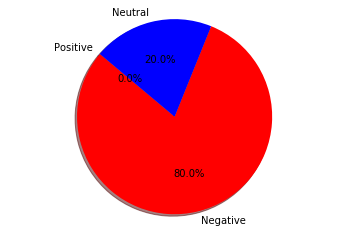

In [54]:
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

#Categorize each review
for review in reviews:
    sentiment = TextBlob(review)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
    
print("Final summarized counts :", values)

import matplotlib.pyplot as plt
#Set colors by label
colors=["Red","Blue","Green"]

print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()